# Formula 1 Data Analisys

<h3>Packages</h3>

In [123]:
import pandas as pd
import numpy as np
from IPython.display import display_html 
import matplotlib.pyplot as plt
import datetime
import math

ActualYear = 2021

Years = list()
Years = [i for i in range(1950,ActualYear)]

YearsTeams = list()
YearsTeams = [i for i in range(1958,ActualYear)]

### Import the data

In [79]:
DriversRaw = list()
DriversRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/drivers.html') for i in range(1950,ActualYear)] 

In [80]:
TeamsRaw = list()
TeamsRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/team.html') for i in range(1958,ActualYear)] 

In [81]:
RacesRaw = list()
RacesRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/races.html') for i in range(1950,ActualYear)]

In [82]:
FastLapsRaw = list()
FastLapsRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/fastest-laps.html') for i in range(1950,ActualYear)]

### Save Data as .csv files

In [83]:
for year in Years: 
    DriversRaw[year-1950][0].to_csv(r'.\data\Drivers\Drivers'+str(year)+'.csv', index = False)
    TeamsRaw[year-1958][0].to_csv(r'.\data\Teams\Teams'+str(year)+'.csv', index = False)
    RacesRaw[year-1950][0].to_csv(r'.\data\Races\Races'+str(year)+'.csv', index = False)
    FastLapsRaw[year-1950][0].to_csv(r'.\data\FastestLaps\FastestLaps'+str(year)+'.csv', index = False)

In [229]:
DriversRaw = list()
DriversRaw = [pd.read_csv('.\data\Drivers\Drivers'+str(i)+'.csv') for i in Years] 
TeamsRaw = list()
TeamsRaw = [pd.read_csv('.\data\Teams\Teams'+str(i)+'.csv') for i in range(1958,ActualYear)] 
RacesRaw = list()
RacesRaw = [pd.read_csv('.\data\Races\Races'+str(i)+'.csv') for i in Years] 
FastLapsRaw = list()
FastLapsRaw = [pd.read_csv('.\data\FastestLaps\FastestLaps'+str(i)+'.csv') for i in Years] 

In [230]:
for year in Years: 
    DriversRaw[year-1950] = pd.DataFrame(DriversRaw[year-1950])
    TeamsRaw[year-1958] = pd.DataFrame(TeamsRaw[year-1958])
    RacesRaw[year-1950] = pd.DataFrame(RacesRaw[year-1950])
    FastLapsRaw[year-1950] = pd.DataFrame(FastLapsRaw[year-1950])

In [86]:
TeamsRaw[0].head()

,Unnamed: 0,Pos,Team,PTS,Unnamed: 4
0,NaN,1,Vanwall,48,NaN
1,NaN,2,Ferrari,40,NaN
2,NaN,3,Cooper Climax,31,NaN
3,NaN,4,BRM,18,NaN
4,NaN,5,Maserati,6,NaN


In [87]:
DriversRaw[0].head()

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Nino Farina FAR,ITA,Alfa Romeo,30,NaN
1,NaN,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27,NaN
2,NaN,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24,NaN
3,NaN,4,Louis Rosier ROS,FRA,Talbot-Lago,13,NaN
4,NaN,5,Alberto Ascari ASC,ITA,Ferrari,11,NaN


In [88]:
RacesRaw[0].head()

,Unnamed: 0,Grand Prix,Date,Winner,Car,Laps,Time,Unnamed: 7
0,NaN,Great Britain,13 May 1950,Nino Farina FAR,Alfa Romeo,70,2:13:23.600,NaN
1,NaN,Monaco,21 May 1950,Juan Manuel Fangio FAN,Alfa Romeo,100,3:13:18.700,NaN
2,NaN,Indianapolis 500,30 May 1950,Johnnie Parsons PAR,Kurtis Kraft Offenhauser,138,2:46:55.970,NaN
3,NaN,Switzerland,04 Jun 1950,Nino Farina FAR,Alfa Romeo,42,2:02:53.700,NaN
4,NaN,Belgium,18 Jun 1950,Juan Manuel Fangio FAN,Alfa Romeo,35,2:47:26.000,NaN


In [91]:
FastLapsRaw[0].head()

,Unnamed: 0,Grand Prix,Date,Winner,Car,Laps,Time,Unnamed: 7
0,NaN,Great Britain,13 May 1950,Nino Farina FAR,Alfa Romeo,70,2:13:23.600,NaN
1,NaN,Monaco,21 May 1950,Juan Manuel Fangio FAN,Alfa Romeo,100,3:13:18.700,NaN
2,NaN,Indianapolis 500,30 May 1950,Johnnie Parsons PAR,Kurtis Kraft Offenhauser,138,2:46:55.970,NaN
3,NaN,Switzerland,04 Jun 1950,Nino Farina FAR,Alfa Romeo,42,2:02:53.700,NaN
4,NaN,Belgium,18 Jun 1950,Juan Manuel Fangio FAN,Alfa Romeo,35,2:47:26.000,NaN


In [92]:
print(f'Total Drivers: {len(DriversRaw)}')
print(f'Total Teams: {len(TeamsRaw)}')
print(f'Total Teams: {len(RacesRaw)}')
print(f'Total Teams: {len(FastLapsRaw)}')

Total Drivers: 71
Total Teams: 63
Total Teams: 71
Total Teams: 71


### Number of Driver Champions and Constructors Champions

#### Constructors

In [93]:
ConstructorChampions = [TeamsRaw[i].Team[0] for i in range(0,ActualYear-1958)]

UniqueTeamsChampionms = np.array(ConstructorChampions)

for team in np.unique(UniqueTeamsChampionms):
    print(team,": ", ConstructorChampions.count(team))



BRM :  1
Benetton Renault :  1
Brabham Repco :  2
Brawn Mercedes :  1
Cooper Climax :  2
Ferrari :  16
Lotus Climax :  2
Lotus Ford :  5
Matra Ford :  1
McLaren Ford :  1
McLaren Honda :  4
McLaren Mercedes :  1
McLaren TAG :  2
Mercedes :  7
RBR Renault :  1
Red Bull Racing Renault :  3
Renault :  2
Tyrrell Ford :  1
Vanwall :  1
Williams Ford :  2
Williams Honda :  2
Williams Renault :  5


#### Drivers

In [94]:
DriversChampions = [DriversRaw[i].Driver[0] for i in range(0,ActualYear-1950)]
uniqueDriversChampions = np.array(DriversChampions)

WDCPerDriver = pd.DataFrame(columns=["Driver","WDC"])

for driver in np.unique(uniqueDriversChampions):
    WDCPerDriver = WDCPerDriver.append({'Driver':driver,'WDC':DriversChampions.count(driver)},ignore_index=True)

WDCPerDriver.sort_values(by=["WDC"],ascending=False)

,Driver,WDC
23,Michael Schumacher MSC,7
21,Lewis Hamilton HAM,7
18,Juan Manuel Fangio FAN,5
0,Alain Prost PRO,4
32,Sebastian Vettel VET,4
29,Niki Lauda LAU,3
9,Jack Brabham BRA,3
26,Nelson Piquet PIQ,3
10,Jackie Stewart STE,3
3,Ayrton Senna SEN,3


## All

### Drivers

#### Difference in WDC between 1st and 2nd, and 1st and 3th

In [95]:
Drivers1and2Diff = [DriversRaw[i].PTS[0]-DriversRaw[i].PTS[1] for i in range(0,ActualYear-1950)] 
Drivers1and3Diff = [DriversRaw[i].PTS[0]-DriversRaw[i].PTS[2] for i in range(0,ActualYear-1950)] 

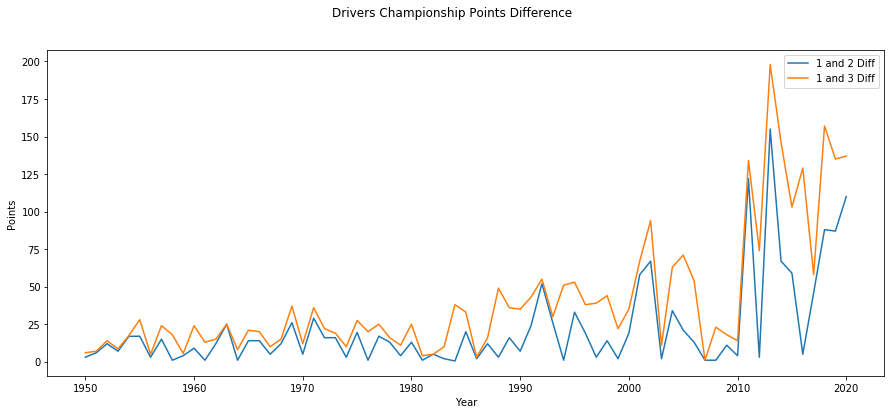

In [96]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(Years,Drivers1and2Diff)
plt.plot(Years,Drivers1and3Diff)
plt.suptitle('Drivers Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
#plt.show()
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

In [97]:
MaxDiff= max(Drivers1and2Diff)
print(MaxDiff,"points between 1rs and 2nd in",Years[Drivers1and2Diff.index(MaxDiff)])
DriversRaw[Drivers1and2Diff.index(MaxDiff)].loc[0:1]

155 points between 1rs and 2nd in 2013


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,397,NaN
1,NaN,2,Fernando Alonso ALO,ESP,Ferrari,242,NaN


In [98]:
MinDiff= min(Drivers1and2Diff)
print(MinDiff,"points between 1rs and 2nd in",Years[Drivers1and2Diff.index(MinDiff)])
DriversRaw[Drivers1and2Diff.index(MinDiff)].loc[0:1]

0.5 points between 1rs and 2nd in 1984


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Niki Lauda LAU,AUT,McLaren TAG,72.0,NaN
1,NaN,2,Alain Prost PRO,FRA,McLaren TAG,71.5,NaN


#### Difference in WDC between 1st and 2nd, and 1st and 3th in % considering the total of the 2nd and 3th respect to the 1st

In [99]:
Drivers1and2DiffPerc = [(Drivers1and2Diff[i]/DriversRaw[i].PTS[1])*100 for i in range(0,ActualYear-1950)] 
Drivers1and3DiffPerc = [(Drivers1and3Diff[i]/DriversRaw[i].PTS[2])*100 for i in range(0,ActualYear-1950)] 

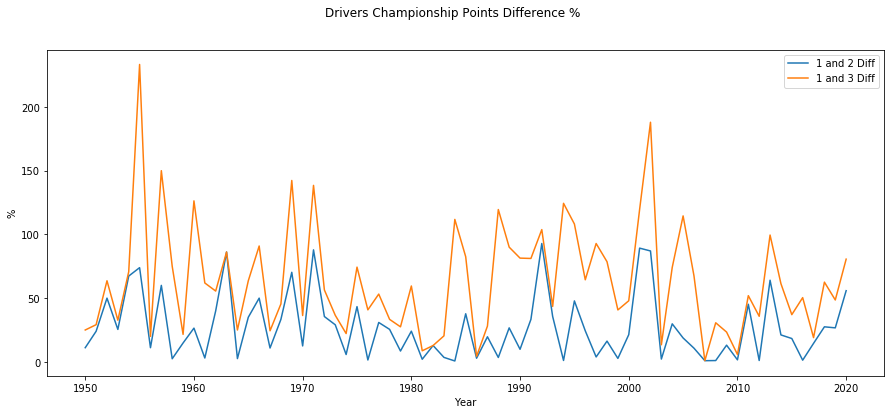

In [100]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(Years,Drivers1and2DiffPerc)
plt.plot(Years,Drivers1and3DiffPerc)
plt.suptitle('Drivers Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

## Constructors

### Difference in WCC between 1st and 2nd, and 1st and 3th

In [101]:
Teams1and2Diff = [TeamsRaw[i].PTS[0]-TeamsRaw[i].PTS[1] for i in range(0,ActualYear-1958)] 
Teams1and3Diff = [TeamsRaw[i].PTS[0]-TeamsRaw[i].PTS[2] for i in range(0,ActualYear-1958)] 

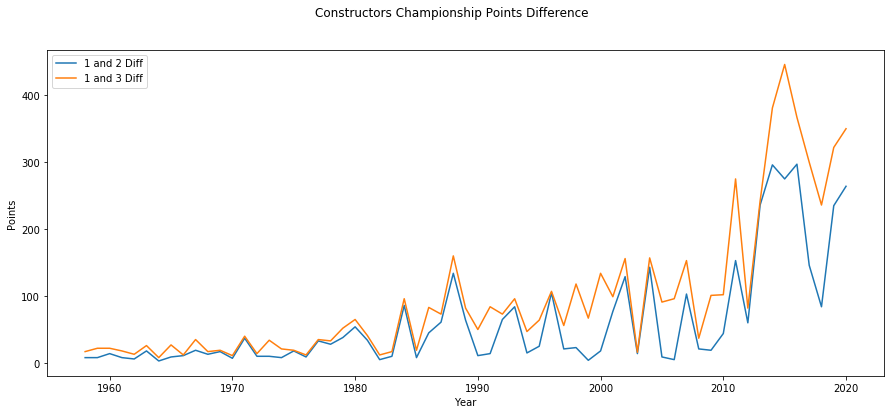

In [105]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(YearsTeams,Teams1and2Diff)
plt.plot(YearsTeams,Teams1and3Diff)
plt.suptitle('Constructors Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

In [106]:
MaxDiff= max(Teams1and2Diff)
print(MaxDiff,"points between 1rs and 2nd in",Years[Teams1and2Diff.index(MaxDiff)])
TeamsRaw[Teams1and2Diff.index(MaxDiff)].loc[0:1]

297 points between 1rs and 2nd in 2008


,Unnamed: 0,Pos,Team,PTS,Unnamed: 4
0,NaN,1,Mercedes,765,NaN
1,NaN,2,Red Bull Racing TAG Heuer,468,NaN


In [107]:
MinDiff= min(Teams1and2Diff)
print(MinDiff,"points between 1rs and 2nd in",Years[Teams1and2Diff.index(MinDiff)])
TeamsRaw[Teams1and2Diff.index(MinDiff)].loc[0:1]

3 points between 1rs and 2nd in 1956


,Unnamed: 0,Pos,Team,PTS,Unnamed: 4
0,NaN,1,Ferrari,45,NaN
1,NaN,2,BRM,42,NaN


### Difference in WCC between 1st and 2nd, and 1st and 3th in % considering the total of the 2nd and 3th respect to the 1st

In [108]:
Teams1and2DiffPerc = [(Teams1and2Diff[i]/TeamsRaw[i].PTS[1])*100 for i in range(0,ActualYear-1958)] 
Teams1and3DiffPerc = [(Teams1and3Diff[i]/TeamsRaw[i].PTS[2])*100 for i in range(0,ActualYear-1958)] 

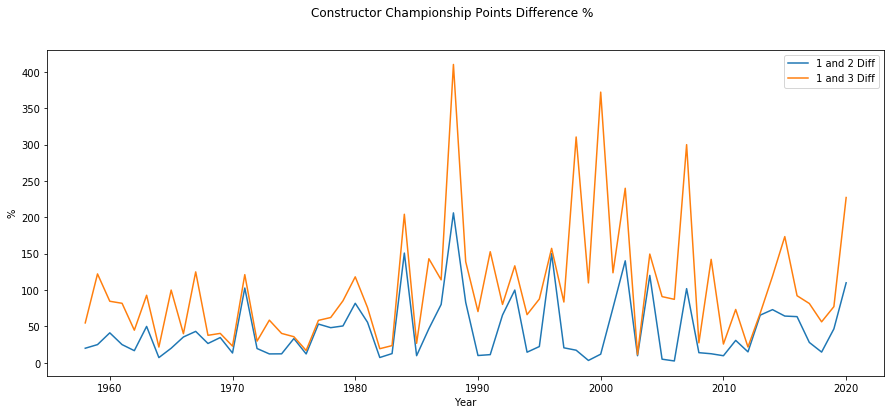

In [110]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 6))
plt.plot(YearsTeams,Teams1and2DiffPerc)
plt.suptitle('Constructor Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.plot(YearsTeams,Teams1and3DiffPerc)
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

<h1> </h1>

## Races

### Cout races per year

In [111]:
RacesCount = [RacesRaw[i].shape[0] for i in range(0,ActualYear-1950)]

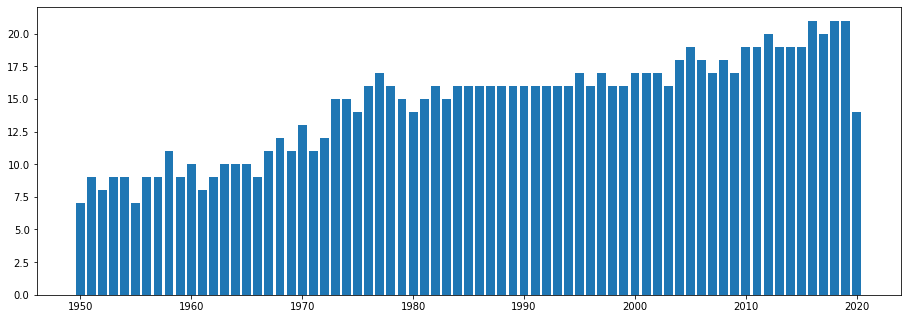

In [112]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesCount)
plt.show()

<h1></h1>

### Races won by the WDC per year

In [113]:
year = 0
count = 0
RacesWinChampions = list()
for driver in DriversChampions:
    for race in RacesRaw[year].Winner:
        if driver==race:
            count=count+1
    year=year+1
    RacesWinChampions.append(count)
    count=0

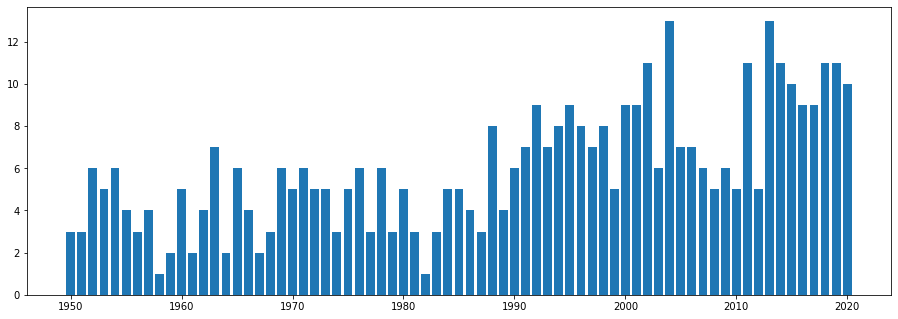

In [114]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesWinChampions)
plt.show()

In [115]:
MostWins=max(RacesWinChampions)
print("Most races wins in a year is",MostWins,"by",DriversChampions[RacesWinChampions.index(MostWins)],"in",Years[RacesWinChampions.index(MostWins)])

LessWins=min(RacesWinChampions)
print("Less races wins in a year is",LessWins,"by",DriversChampions[RacesWinChampions.index(LessWins)],"in",Years[RacesWinChampions.index(LessWins)],", and Keke  Rosberg  ROS in 1982")

Most races wins in a year is 13 by Michael  Schumacher  MSC in 2004
Less races wins in a year is 1 by Mike  Hawthorn  HAW in 1958 , and Keke  Rosberg  ROS in 1982


### Races won by the WDC per year in % respect the total races

In [116]:
RacesWinChampionsPerc = list()
RacesWinChampionsPerc = [(RacesWinChampions[year]/RacesCount[year])*100 for year in range(0,len(Years))]

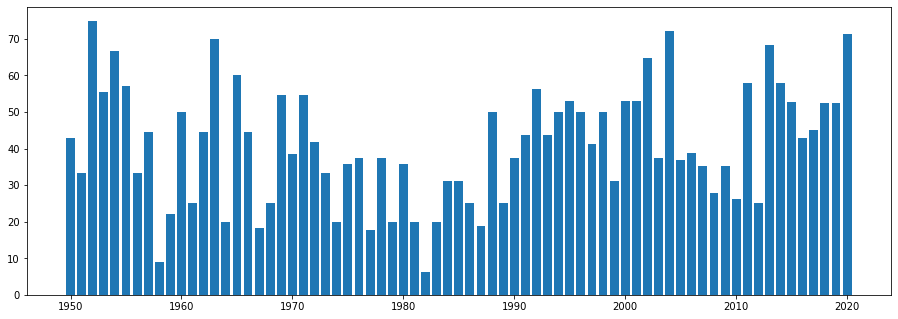

In [117]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesWinChampionsPerc)
plt.show()

In [118]:
MostPerWins=max(RacesWinChampionsPerc)
print("Most races wins in a year is",MostPerWins,"% by",DriversChampions[RacesWinChampionsPerc.index(MostPerWins)],"in",Years[RacesWinChampionsPerc.index(MostPerWins)])

LessPerWins=min(RacesWinChampionsPerc)
print("Less races wins in a year is",LessPerWins,"% by",DriversChampions[RacesWinChampionsPerc.index(LessPerWins)],"in",Years[RacesWinChampionsPerc.index(LessPerWins)])

Most races wins in a year is 75.0 % by Alberto  Ascari  ASC in 1952
Less races wins in a year is 6.25 % by Keke  Rosberg  ROS in 1982


<h1> </h1>

## Races

In [120]:
RacesRaw = pd.DataFrame(RacesRaw)
CountriesRacesList=list()
CountriesRaces = pd.DataFrame(columns=["GPs","Times"])

for year in Years:
    for race in np.unique(RacesRaw[0][year-1950]["Grand Prix"]):
        CountriesRacesList.append(race)
        
uniqueGPs = np.array(CountriesRacesList)

for race in np.unique(uniqueGPs):
    CountriesRaces = CountriesRaces.append({'GPs':race,'Times':CountriesRacesList.count(race)},ignore_index=True)

Exit = CountriesRaces.sort_values(by=["Times"],ascending=False)


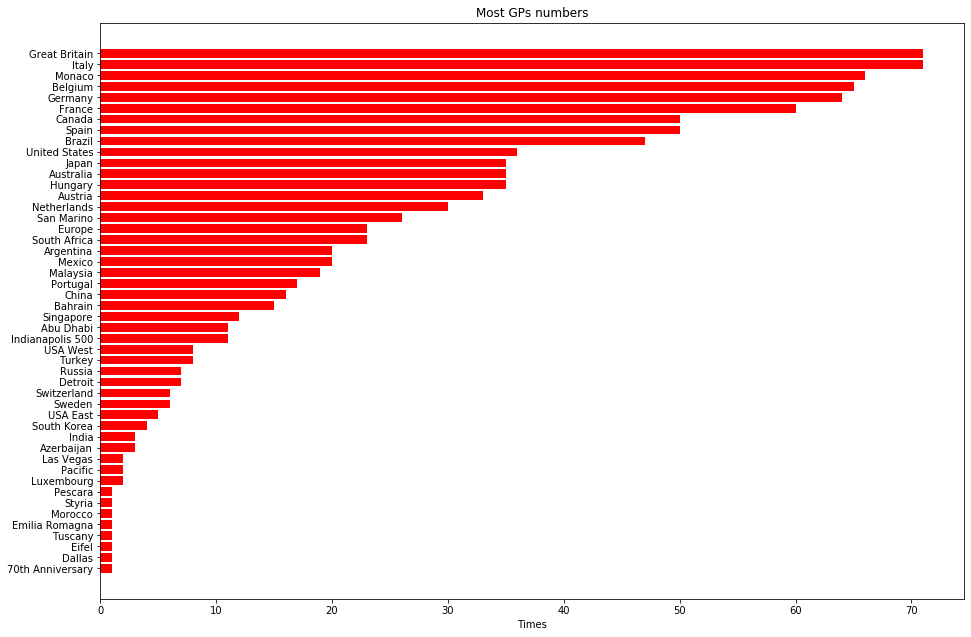

In [121]:
import matplotlib.pyplot as plt

fig, plt = plt.subplots()
plt = fig.add_axes([0,0,2,2])

plt.set_title('Most GPs numbers')
plt.set_xlabel('Times')

plt.barh(Exit["GPs"], Exit["Times"],color="red")
plt.invert_yaxis()

<h3>More laps race and Less laps race</h3>

In [137]:
RacesRaw = pd.DataFrame(RacesRaw)
Laps = 0

for year in Years:
    for race in range(0,(len(RacesRaw[0][year-1950])-1)):
        if not np.isnan(RacesRaw[0][year-1950].loc[race].Laps):
            if int(RacesRaw[0][year-1950].loc[race].Laps) > Laps and (int(RacesRaw[0][year-1950].loc[race].Laps)<200):
                Laps = int(RacesRaw[0][year-1950].loc[race].Laps)
                Carrera = RacesRaw[0][year-1950].loc[race]

pd.DataFrame(Carrera)

,2
Unnamed: 0,NaN
Grand Prix,Indianapolis 500
Date,30 May 1950
Winner,Johnnie Parsons PAR
Car,Kurtis Kraft Offenhauser
Laps,138
Time,2:46:55.970
Unnamed: 7,NaN


In [139]:
RacesRaw = pd.DataFrame(RacesRaw)
Laps = 200

for year in Years:
    for race in range(0,(len(RacesRaw[0][year-1950])-1)):
        if not np.isnan(RacesRaw[0][year-1950].loc[race].Laps):
            if int(RacesRaw[0][year-1950].loc[race].Laps) < Laps:
                Laps = int(RacesRaw[0][year-1950].loc[race].Laps)
                Carrera = RacesRaw[0][year-1950].loc[race]

pd.DataFrame(Carrera)

,6
Unnamed: 0,NaN
Grand Prix,Germany
Date,01 Aug 1971
Winner,Jackie Stewart STE
Car,Tyrrell Ford
Laps,12
Time,1:29:15.700
Unnamed: 7,NaN


<h2>Fastest Laps</h2>

In [231]:
NaNRacesTime = 0
minutesYear = 0
TimePerYear = list()
for year in Years:
    for race in range(0,RacesCount[year-1950]-1):
        if isinstance(RacesRaw[year-1950].Time[race], str):
            TimeRace = RacesRaw[year-1950].Time[race]
            TimeRace = TimeRace.split(':')
            if len(TimeRace)==3:
                minutesYear = minutesYear+(int(TimeRace[0])*60)+(int(TimeRace[1]))
            else:
                minutesYear = minutesYear+(int(TimeRace[0]))
        else:
            NaNRacesTime=NaNRacesTime+1
    TimePerYear.append(minutesYear/((RacesCount[year-1950])-NaNRacesTime))
    NaNRacesTime = 0
    minutesYear = 0

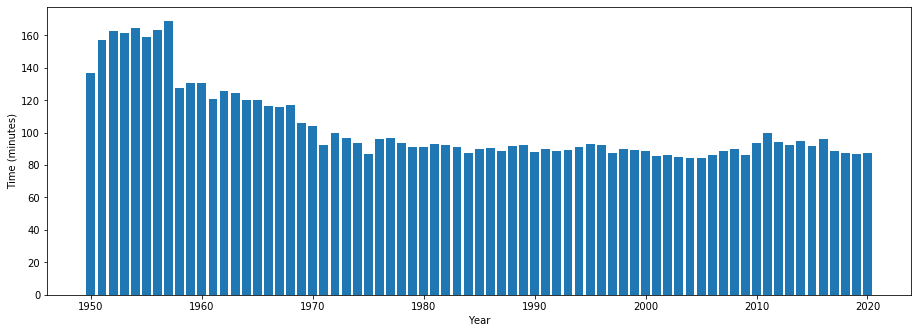

In [232]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,TimePerYear)
ax.set_xlabel('Year')
ax.set_ylabel('Time (minutes)')
plt.show()

In [254]:
DriversWithFL = list()
for year in range(0,ActualYear-1950):
    for driver in range(0, len(FastLapsRaw[year])):
        DriversWithFL.append(FastLapsRaw[year].Driver[driver])
uniqueDriversWithFL = np.array(DriversWithFL)

FLPerDriver = pd.DataFrame(columns=["Driver","Fastest Laps Number"])

for driver in np.unique(uniqueDriversWithFL):
    FLPerDriver = FLPerDriver.append({'Driver':driver,'Fastest Laps Number':DriversWithFL.count(driver)},ignore_index=True)

FLPerDriver.sort_values(by=["Fastest Laps Number"],ascending=False).head()


,Driver,Fastest Laps Number
88,Michael Schumacher MSC,76
77,Lewis Hamilton HAM,53
74,Kimi Räikkönen RAI,46
1,Alain Prost PRO,41
120,Sebastian Vettel VET,38
